## Titanic Project

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Features of the dataset
 Pclass-Ticket class-1 = 1st, 2 = 2nd, 3 = 3rd

Age	-in numbers


Sibsp-# of siblings / spouses aboard the Titanic

Parch of parents / children aboard the Titanic

Ticket number

Fare

Cabin numbers

Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown

### Survived is our label column in which we got 2 classes 0(died) and 1(survived).



In [3]:
#checking shape of the dataset
df.shape
# we got 891 rows and 12 columns

(891, 12)

In [4]:
#check for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Name,Sex , Embarked ,Cabin are object datatypes so we need to convert it into int/float data type as well.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Age columns is having 177 nan values,cabing is 687  and emraked is having 2 null values.

For nan or null values we use Imputation techniques and for object into int conversion we use encoding techniqes

In [6]:
#first dropping the passenger id column as it has nothing to do with the survival
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [7]:
df.shape
#after dropping th columns we rae left with the 8 columns only

(891, 8)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Filling the Null values

In [9]:
df['Age'].isnull().sum()


177

In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

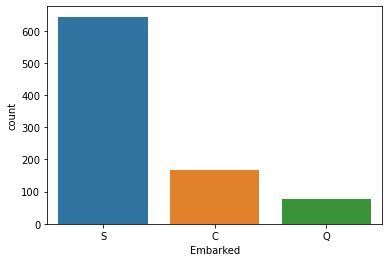

In [11]:
sns.countplot(df['Embarked'])
plt.show()



 More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.based on this countplot let us replace the missing values with S

In [12]:
df['Embarked']=df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()
## Succesfully filled the 2 nan values

0

In [13]:
#Checking the column age null values
df['Age'].isnull().sum()

177

In [14]:
df['Age'].nunique()

88

There are 88 unique age values in that column



In [15]:
df['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Max value is 80 that means outliers could be there lets plot a box plot and visualize it

0.38910778230082704


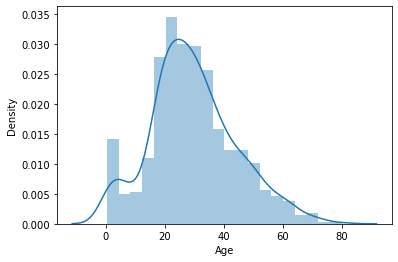

In [16]:
print(df['Age'].skew())
sns.distplot(df['Age'])
plt.show()

We can cleary see this is slightly rightly skewed but in accpetable range so we can use the mean value to fill the missing data.as we rounded off the mean it will became median so I am going to fill null values with medain of the column

In [17]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

#suuccesfully filled the null value

0

In [18]:
#again cehcking for null values in df
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [20]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Visualization

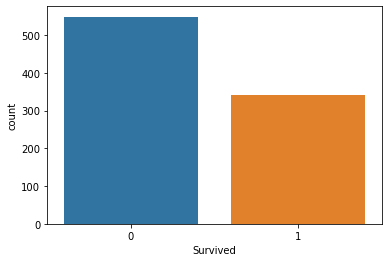

In [23]:
sns.countplot(df['Survived'])
plt.show()

In [24]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64


Out of 891 passengers only 342 passengers survived. i.e 38%

In [25]:
#Checking the elements in Pclass

df['Pclass'].unique()
#there are 3 classes in 1,2 and 3


array([3, 1, 2], dtype=int64)

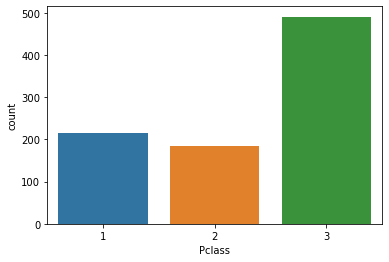

In [26]:
sns.countplot(df['Pclass'])
plt.show()


From this we can see that majority of the passengers are travelling in 3rd class, and less passengers in second class



In [27]:
#Getting the counts of elements
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see 491 passengers are 3rd class-55%, 216 are 1st class - 24% and 184 are 2nd class-21%.



<AxesSubplot:xlabel='Sex', ylabel='count'>

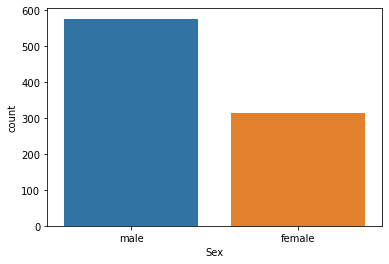

In [28]:
#Visualising the count of passengers gender
sns.countplot(df['Sex'])

In [29]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

we can see male are 577-65% ,and remaining 314 are female -35%

In [30]:
#hecking column sibsp
df['SibSp'].nunique()

7

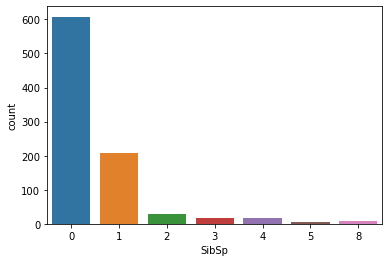

In [31]:
sns.countplot(df['SibSp'])
plt.show()

Majority of passengers doesn't have sibblings/sisters or might be not travelled with them



In [32]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We can see number of passengers travelled along with their sibblings and how many sibblings they had



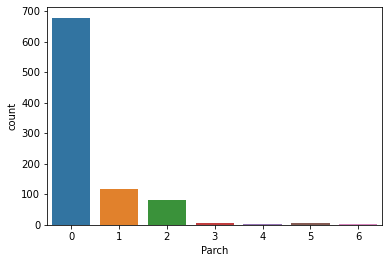

In [33]:
#checking for Parch
sns.countplot(df['Parch'])
plt.show()

Majority of passengers traveled alone without parents/children



In [34]:
#counting
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Count of the travellers with no. of parents/child along with them



In [35]:
#Checking the fare column
df['Fare'].nunique()

248

There 248 different fares - Difference might be due to class, embarked station, group tickets, amenities they choosen etc.



In [36]:
print("Lowest fare",df['Fare'].min())
print("Highest Fare",df['Fare'].max())

Lowest fare 0.0
Highest Fare 512.3292


Least fare is 0.0: from this we can assume- data not recorded or might be given free tickets as complimentary



In [37]:
#Checking how many travelled with 0.0 fare
free=[]
for i in df['Fare']:
    if i==0:
        free.append(i) 
print(len(free))

15


15 people traveled with 0 fare.



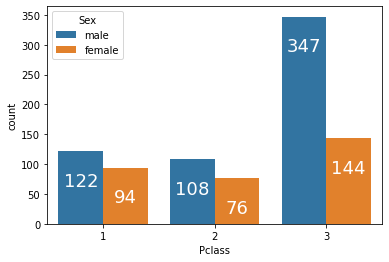

In [38]:
#Visualising how many male and female are present in each passenger class
ax=sns.countplot(x='Pclass',hue='Sex',data=df)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see in each class , male are more than female



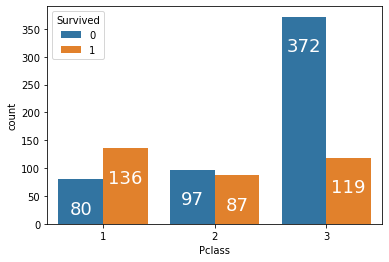

In [39]:
#Visualising how many survived in which pclass
ax=sns.countplot(x='Pclass',hue='Survived',data=df)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see the max no.of people survived are from class 1 , class 3 and class 2



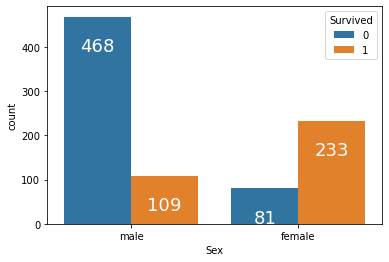

In [40]:
#Checking how many male and female survived 
ax=sns.countplot(x='Sex',hue='Survived',data=df)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

We can see female survived more than male



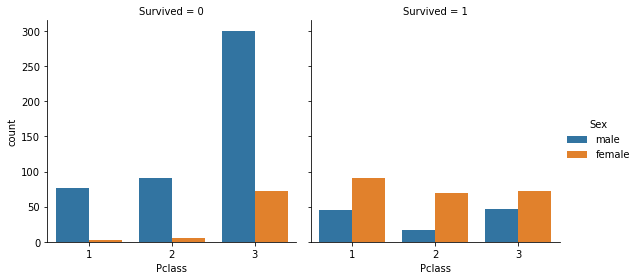

In [41]:
#Checking how many number of male and female survived in each class
ax=sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=1);

We can see majority of female survived are from 1st class Very less number of female died in class 1 and class 2 than compared to class 3



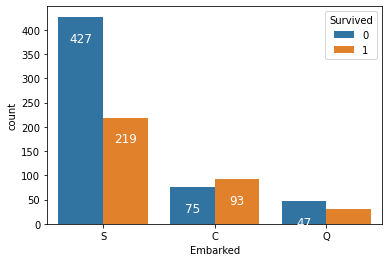

In [42]:
#Checking the port embarked and survival
ax=sns.countplot(x="Embarked", hue="Survived", data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

We can see that majority of survivors are embarked at port 2

Where

S-2

Q-1

C-0



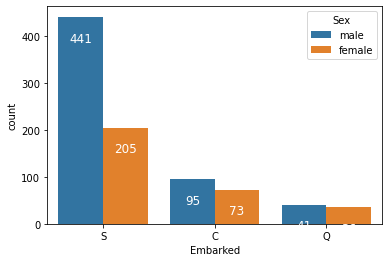

In [43]:
#Checking how many male and female embarked at each station
ax=sns.countplot(x="Embarked", hue="Sex", data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

Majority of Passengers embarked at station S i.e.2



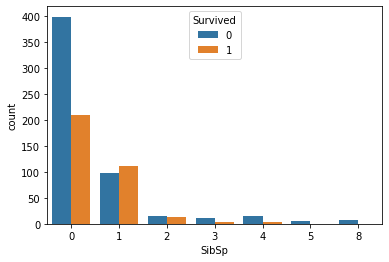

In [44]:
#Checking how many passengers having sibblings on board survived
ax=sns.countplot(x="SibSp", hue="Survived", data=df)


Majority of passengers who survived are having one sibbling or no sibblings



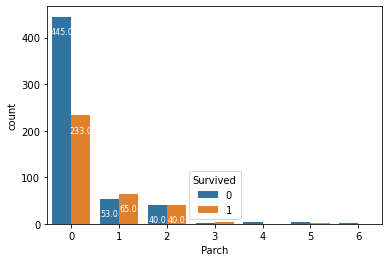

In [45]:
ax=sns.countplot(x="Parch", hue="Survived", data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)

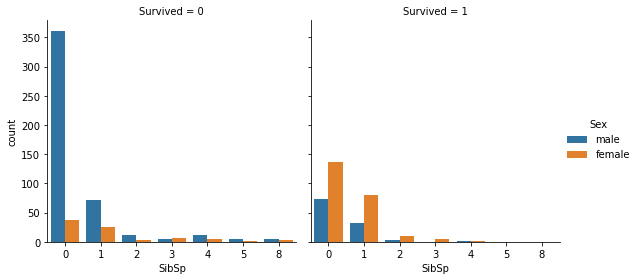

In [46]:
#Seeing the gender of how many passengers with SibSp survived or not 
ax=sns.catplot(x="SibSp", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=1);

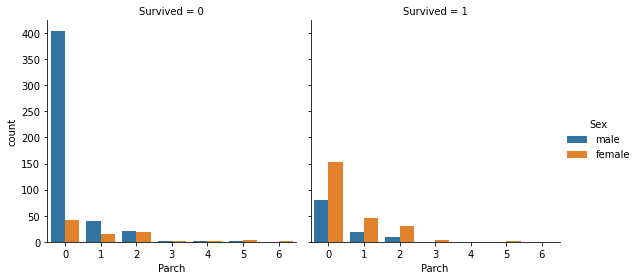

In [47]:
#Checking gender wise count of how many survived with no.of parents or child
g=sns.catplot(x="Parch", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=1);

In [48]:
from sklearn.preprocessing import LabelEncoder


### Converting object datatype into int using label encoder

In [50]:
lab_enc=LabelEncoder()


In [51]:
df_exclude_numeric = df.select_dtypes(exclude=np.number).columns # df with categorical data only
df_exclude_numeric
df[df_exclude_numeric].head()


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [52]:
for i in df_exclude_numeric:
    df[i] = lab_enc.fit_transform(df[i])
print("Encoded data")
df.head()

Encoded data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Converted data 

Female-0    Male-1

C-0,     Q-1,   S-2

In [53]:
df.shape

(891, 8)

In [54]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


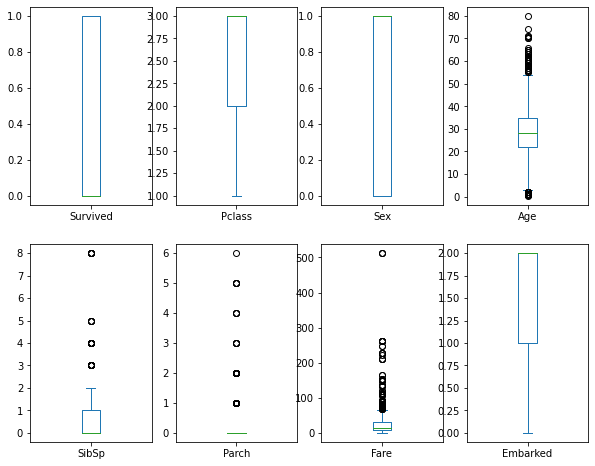

In [55]:
#Checking for outliers
df.plot(kind='box',subplots=True,figsize=(10,8),layout=(2,4))
plt.show()

##### Outliers are present in age,SibSp,Parch and fare

### Removing outliers using zscore


In [56]:
from scipy.stats import zscore

In [57]:
z=np.abs(zscore(df))
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.737695,0.565736,0.432793,0.473674,0.502445,0.585954
1,1.266990,1.566107,1.355574,0.663861,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.827377,1.355574,0.258337,0.474545,0.473674,0.488854,0.585954
3,1.266990,1.566107,1.355574,0.433312,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.737695,0.433312,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.181487,0.474545,0.473674,0.386671,0.585954
887,1.266990,1.566107,1.355574,0.796286,0.474545,0.473674,0.044381,0.585954
888,0.789272,0.827377,1.355574,0.104637,0.432793,2.008933,0.176263,0.585954
889,1.266990,1.566107,0.737695,0.258337,0.474545,0.473674,0.044381,1.942303


In [58]:
df=df[(z<3).all(axis=1)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [59]:
dataloss=(891-820)/891*100
print("dataloss after outlier removal : ",dataloss)

dataloss after outlier removal :  7.968574635241302


We lost around 8% of data. Acceptable range.



In [60]:
#Let us check the skewness
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

Since this is a classification problem , we can remove skewness only in columns with continuous data. So here we will remove skewness in fare



Skewness: 2.318760976737288


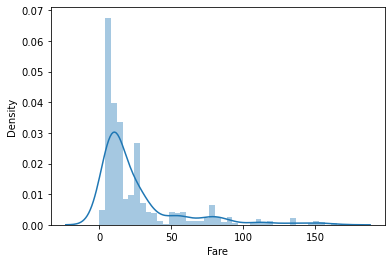

In [61]:
#Removing skewness in column Fare
sns.distplot(df['Fare'])
print('Skewness:',df['Fare'].skew())

In [62]:
#Using log transform to reduce skewness. since the column has 0 we are adding constant 1 to all values in the column
df['Fare']=np.log(df['Fare']+1)
df['Fare'].skew()

0.19636409783591077

Skewness: after np log 0.19636409783591077


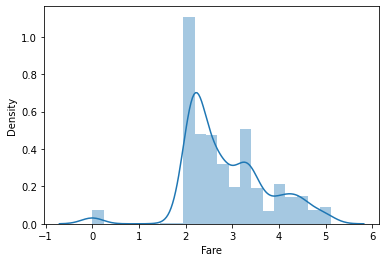

In [63]:
sns.distplot(df['Fare'])
print('Skewness: after np log',df['Fare'].skew())

Skewness reduced from 2.3 to 0.2



In [64]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Splitting dataset into x(features) and Y(label)

In [65]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [66]:
Y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

### Taking care of Class imbalance

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smt=SMOTE()

In [69]:
X,Y=smt.fit_resample(X,Y)

In [70]:
Y.value_counts()

0    500
1    500
Name: Survived, dtype: int64

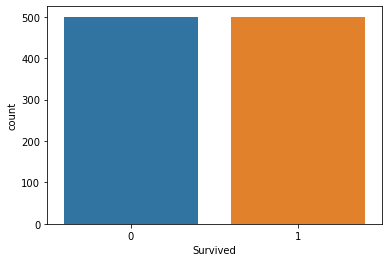

In [71]:
#visualizing it
sns.countplot(Y)
plt.xlabel("Survived")
plt.show()

In [72]:
#Scaling the features in the dataset
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(X)
print("data is Scaled now")

data is Scaled now


In [73]:
x

array([[ 0.9141225 ,  0.87032709, -0.60444393, ..., -0.45102779,
        -0.92415382,  0.60788107],
       [-1.44795115, -1.1489933 ,  0.69201048, ..., -0.45102779,
         1.49368756, -1.88855042],
       [ 0.9141225 , -1.1489933 , -0.28033032, ..., -0.45102779,
        -0.836544  ,  0.60788107],
       ...,
       [-0.26691432, -1.1489933 , -0.42974207, ..., -0.45102779,
        -0.02260663,  0.60788107],
       [-1.44795115, -1.1489933 , -0.11827352, ..., -0.45102779,
         1.83001555, -1.88855042],
       [-0.26691432, -1.1489933 , -1.90089833, ...,  1.38241851,
         0.28539746,  0.60788107]])

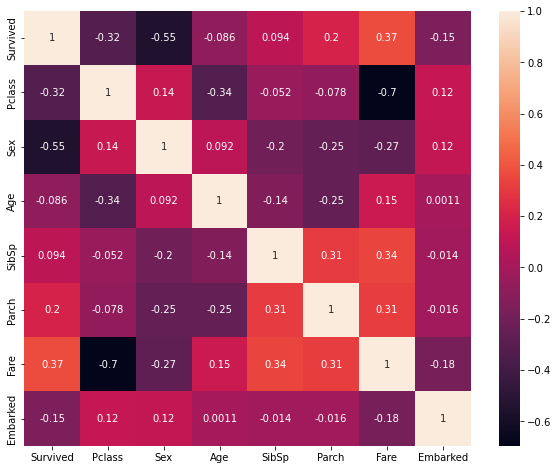

In [74]:
### Lets plot heatmap and check for correlation
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

I See such no positive corelation or Multicolineraity here


### Now our data is ready to send for the model to train and test



In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV 

### For best random State


In [76]:
lr=LogisticRegression()

In [77]:

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1)):
        print("At random_stat",i,"the model performed very well")
        print("At random_stat",i)
        print("Trainning Score",accuracy_score(y_train,pred_train)*100)
        print("Testing Score",accuracy_score(y_test,pred_test)*100,'\n\n')

At random_stat 16 the model performed very well
At random_stat 16
Trainning Score 80.5
Testing Score 80.5 


At random_stat 50 the model performed very well
At random_stat 50
Trainning Score 80.5
Testing Score 80.5 


At random_stat 66 the model performed very well
At random_stat 66
Trainning Score 80.0
Testing Score 80.0 




In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=16)

In [79]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

Shape of x_train (750, 7)
Shape of x_test (250, 7)
Shape of y_train (750,)
Shape of y_train (250,)


### Writing one function for different models accuracy


In [80]:
def metric_score(model, x, Y):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting for training
    pred_train = model.predict(x_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
     # Accuracy Score for training
    acc_score1 = (accuracy_score(y_train, pred_train))*100
    print("Accuracy Score for training:", acc_score1)
    
    # Accuracy Score for testing
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score for testing:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    #cv_score = (cross_val_score(model, x, Y, cv=5).mean())*100
    #print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    #result = acc_score - cv_score
    #print("\nAccuracy Score - Cross Validation Score is", result)


I have defined a class that will perform the training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score  for any machine learning model that calls for this function.

### Logistic Regression

In [81]:
model=LogisticRegression()
metric_score(model, x, Y)


Accuracy Score for training: 81.06666666666666
Accuracy Score for testing: 79.2

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       135
           1       0.77      0.77      0.77       115

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



### RandomForestClassifier

In [82]:
model=RandomForestClassifier()

metric_score(model, x, Y)

Accuracy Score for training: 98.4
Accuracy Score for testing: 80.80000000000001

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       135
           1       0.80      0.77      0.79       115

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



### Decision Tree

In [83]:
model=DecisionTreeClassifier()
metric_score(model, x, Y)

Accuracy Score for training: 98.53333333333333
Accuracy Score for testing: 76.4

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       135
           1       0.75      0.72      0.74       115

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



### SVC

In [84]:
model=SVC()
metric_score(model, x, Y)

Accuracy Score for training: 84.8
Accuracy Score for testing: 82.0

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       135
           1       0.84      0.75      0.79       115

    accuracy                           0.82       250
   macro avg       0.82      0.81      0.82       250
weighted avg       0.82      0.82      0.82       250



### KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier


In [86]:
model=KNeighborsClassifier()
metric_score(model, x, Y)

Accuracy Score for training: 87.86666666666667
Accuracy Score for testing: 82.39999999999999

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       135
           1       0.79      0.83      0.81       115

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



### XGB

In [87]:
import xgboost as xgb

In [88]:
model=xgb.XGBClassifier()

metric_score(model, x, Y)

Accuracy Score for training: 97.86666666666667
Accuracy Score for testing: 78.4

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       135
           1       0.77      0.77      0.77       115

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [89]:
lr=LogisticRegression()
svc=SVC()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [90]:
models=[lr,dt,rfc,svc,knn]
for m in models:
    cvscore=cross_val_score(m,x,Y,cv=10)
    print(f'Metrics of model {m}')
    print(cvscore)
    print(f'Mean cv score: ',cvscore.mean())
    print(cvscore.std())
    print('\n')

Metrics of model LogisticRegression()
[0.78 0.75 0.84 0.74 0.7  0.74 0.87 0.85 0.82 0.86]
Mean cv score:  0.7950000000000002
0.057314919523628396


Metrics of model DecisionTreeClassifier()
[0.72 0.83 0.81 0.75 0.8  0.76 0.91 0.88 0.86 0.92]
Mean cv score:  0.8240000000000001
0.06499230723708768


Metrics of model RandomForestClassifier()
[0.76 0.8  0.87 0.78 0.78 0.78 0.9  0.9  0.86 0.93]
Mean cv score:  0.8360000000000001
0.05936328831862332


Metrics of model SVC()
[0.81 0.8  0.86 0.78 0.74 0.79 0.89 0.87 0.89 0.89]
Mean cv score:  0.8320000000000001
0.051730068625510245


Metrics of model KNeighborsClassifier()
[0.77 0.81 0.87 0.78 0.81 0.77 0.88 0.88 0.88 0.89]
Mean cv score:  0.834
0.04799999999999999




#### By comparing accuracy_score and cv score : The best model is - SVC

#### SVC Accuracy Score for training: 84.8
#### SVC Accuracy Score for testing: 82.0

####  Mean cv score for SVC is :  0.832



In [92]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(f'The accuracy score of SVC is :',accuracy_score(y_test,pred_svc))
print(f'The confusion matrix of SVC is:\n',confusion_matrix(y_test,pred_svc))
print(f'The classification report of SVC is :\n',classification_report(y_test,pred_svc))

The accuracy score of SVC is : 0.82
The confusion matrix of SVC is:
 [[119  16]
 [ 29  86]]
The classification report of SVC is :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       135
           1       0.84      0.75      0.79       115

    accuracy                           0.82       250
   macro avg       0.82      0.81      0.82       250
weighted avg       0.82      0.82      0.82       250



In [111]:
#Hyper parameter tuning of SVC model using GridSearchCV -which will try to improv accuracy
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [112]:
grid = GridSearchCV(SVC(), param_grid,scoring='accuracy')

In [113]:
grid.fit(x_train,y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [114]:
# print best parameter after tuning
print("Best Parameters :",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("Best Estimaters :",grid.best_estimator_)

Best Parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimaters : SVC(C=1, gamma=0.1)


In [115]:
grid_predictions = grid.predict(x_test)

In [128]:
#print classification report

print("Accuracy Score",accuracy_score(y_test, grid_predictions))
print("classification_report",classification_report(y_test, grid_predictions))

print('\nBest score:',grid.best_score_)



Accuracy Score 0.816
classification_report               precision    recall  f1-score   support

           0       0.79      0.89      0.84       135
           1       0.85      0.73      0.79       115

    accuracy                           0.82       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.82      0.81       250


Best score: 0.8346666666666666


In [136]:
#We got the best parmeters. 
best_model=SVC(C= 1, gamma= 0.1, kernel= 'rbf')
best_model.fit(x_train,y_train)
predb=best_model.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predb))
print('Confusion matrix:\n',confusion_matrix(y_test,predb))
print('classification report:\n',classification_report(y_test,predb))

Accuracy Score 0.816
Confusion matrix:
 [[120  15]
 [ 31  84]]
classification report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       135
           1       0.85      0.73      0.79       115

    accuracy                           0.82       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.82      0.81       250



### We can see that after tuning the parameters our accuracy is not increasing so we can save our model in its defaultform

In [141]:
#Making a data frame to see the values actual and predicted
result_df=pd.DataFrame({})
result_df['Actual']=y_test
result_df['Predicted']=pred_svc

In [143]:
result_df

,Actual,Predicted
221,0,0
988,1,1
882,1,1
500,1,1
106,0,0
...,...,...
164,1,1
286,0,0
271,0,1
832,1,1


#### We can see majority of the rows are predicted correct



 after hyperparametertuning ,the accuravy remained the same  even it got decreases .. so saving the final model in SVC

#### Lets plot the hyper tuned model and comapre it with the default model

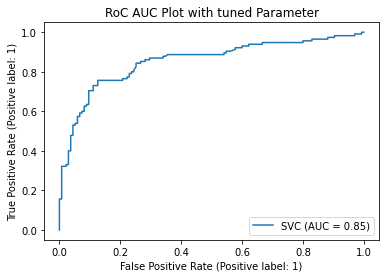

In [164]:
#hyper tuned model
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title('RoC AUC Plot with tuned Parameter')
plt.show()

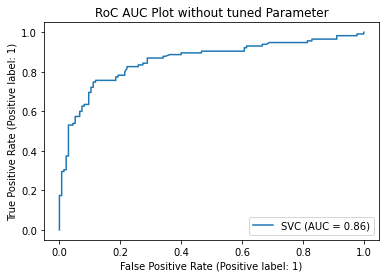

In [165]:
#default model
plot_roc_curve(svc,x_test,y_test)
plt.title('RoC AUC Plot without tuned Parameter')
plt.show()

In [148]:
#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,pred_svc)

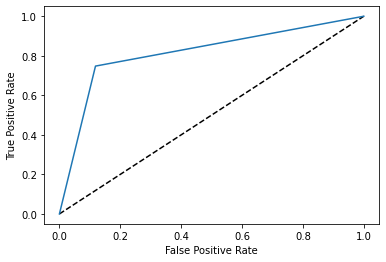

Score: 0.8146537842190017


In [153]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,svc.predict(x_test))
print('Score:',auc_score)

We can see our model is 81% accurate.



### Saving the best model

In [155]:
import pickle
import joblib

In [156]:
filename='Titanc predictions.pkl'

In [157]:
pickle.dump(svc,open(filename,'wb'))